# TP n°1 du module 5 : L'apprentissage supervisé dans le _Machine Learning_

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé. Objectifs :
- Préparer des jeux de données pour l'apprentissage supervisé
- Entraîner un modèle d'arbre de décision
- Evaluer les performances d'un modèle de classification
- Entraîner et évaluer un modèle de régression

_N.B. : La convention de nommage consiste à utiliser "X" en majuscule pour représenter la matrice des caractéristiques (inputs) et "y" en minuscule pour représenter le vecteur des réponses (outputs), afin de distinguer les entrées multivariées des cibles généralement unidimensionnelles._ 

In [111]:
from statistics import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

## Création de modèles de classification pour le Titanic

### Question n°1
Commencez par recharger votre jeu de données sur le Titanic, à partir du csv que vous aviez enregistré à la fin du TP du module 4.

Ainsi, vous obtenez un jeu de données déjà préparé pour l'apprentissage.

In [112]:
titanic = pd.read_csv("Titanic.csv")
titanic

,Survived,Pclass,Age,Fare,FamilyMembers,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.00,7.2500,1,1.0,0.0,0.0,1.0,0.0
1,1,1,38.00,71.2833,1,0.0,1.0,0.0,0.0,0.0
2,1,3,26.00,7.9250,0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.00,53.1000,1,0.0,0.0,0.0,1.0,0.0
4,0,3,35.00,8.0500,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,0,1.0,0.0,0.0,1.0,0.0
887,1,1,19.00,30.0000,0,0.0,0.0,0.0,1.0,0.0
888,0,3,21.75,23.4500,3,0.0,0.0,0.0,1.0,0.0
889,1,1,26.00,30.0000,0,1.0,1.0,0.0,0.0,0.0


### Question n°2
- Séparer vos données en mettant d'un côté les attributs, de l'autre la cible à prédire.

- Ensuite, séparer encore ces groupes entre entraînement et test (proportion : 80% entrainement et 20 de test)

In [113]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train)

     Pclass        Age      Fare  FamilyMembers  Sex_male  Embarked_C  \
525       3  40.500000    7.7500              0       1.0         0.0   
642       3   2.000000   27.9000              5       0.0         0.0   
333       3  16.000000   18.0000              2       1.0         0.0   
31        1  34.611765  146.5208              1       0.0         1.0   
465       3  38.000000    7.0500              0       1.0         0.0   
..      ...        ...       ...            ...       ...         ...   
577       1  39.000000   55.9000              1       0.0         0.0   
458       2  50.000000   10.5000              0       0.0         0.0   
407       2   3.000000   18.7500              2       1.0         0.0   
212       3  22.000000    7.2500              0       1.0         0.0   
205       3   2.000000   10.4625              1       0.0         0.0   

     Embarked_Q  Embarked_S  Embarked_U  
525         1.0         0.0         0.0  
642         0.0         1.0         0.0

### Question n°3
- Créez un arbre de décision, sans option particulière pour l'instant.
- Entraînez-le, puis évaluez-le à l'aide de l'accuracy, sur les jeux de données crées ci-dessus.
- Comparez ce score avec le score moyen obtenu en effectuant une validation croisée sur l'ensemble du jeu de données.

In [114]:
# Entrainement
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# print("Accuracy : ", np.round(tree_score(X_test, y_test), 2))

print("Croised : " , np.round(np.mean(cross_val_score(model, X, y, cv=5)), 2))


Croised :  0.78


### Question n°4
- Calculer également la _précision_ et le _rappel_.
- Cherchez notamment dans la documentation comment indiquer laquelle des deux classes considérer comme la classe positive.
- Quelles observations pouvez-vous faire ?

In [115]:
# Evaluation
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average='binary', pos_label=1)
print("Precision : ", np.round(precision, 2))

rappel = recall_score(y_test, y_pred, average='binary', pos_label=1)
print("Rappel : ", np.round(rappel, 2))


Precision :  0.69
Rappel :  0.64


**Observations :** il n'y a pas d'écart important entre accuracy, précision et rappel. Il semble donc qu'il n'y ait pas de déséquilibre notable au niveau des prédictions.

### Question n°5
- Afficher la matrice de confusion pour cet arbre de décision, sur le jeu de test.
- Commencez par simplement l'afficher de manière textuelle, puis travailler votre affichage à l'aide de _Matplotlib_, afin d'ajouter des couleurs relatives au nombre d'éléments dans chaque case de la matrice.

In [116]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion : ", confusion)

Confusion :  [[89 20]
 [25 45]]


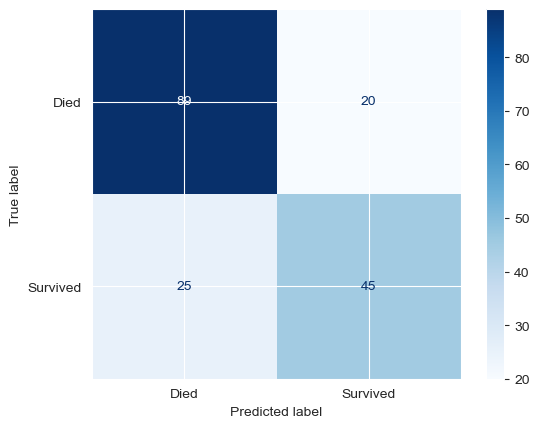

In [117]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Died', 'Survived'])
plt.show()

### Question n°6
- Quelle est la profondeur de l'arbre de décision que vous avez créé ?

In [118]:
print(model.tree_.max_depth)

17


### Question n°7
Créer un 2e arbre de décision, en limitant sa profondeur à 3 niveaux.

Affichez son accuracy sur les données de test :
- Que constatez-vous ?
- Comment pouvez-vous l'expliquer ?

In [119]:
tree_3_depth = DecisionTreeClassifier(max_depth=3)
tree_3_depth.fit(X_train, y_train)

y_pred = tree_3_depth.predict(X_test)

scores_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", np.mean(scores_accuracy))

Accuracy :  0.7486033519553073


**Observation :** en limitant (artificiellement) la profondeur de l'arbre, le score augmente !<br/>
Cela est dû au fait que limiter la profondeur de l'arbre permet d'éviter un phénomène de _surapprentissage_.

### Question n°8
Visualisez ce nouvel arbre de décision :
- Prenez garde à bien faire apparaître les labels du jeu de données,
- Remplacez les valeurs 0 et 1 par des labels textuels de votre choix (ex : 'Died' et 'Survived').

- Quelles observations pouvez-vous faire sur ce nouvel arbre ?
- Les décisions vous paraissent-elles cohérentes avec l'analyse des données faites dans le module 4 ?

[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.472\nsamples = 712\nvalue = [440.0, 272.0]'),
 Text(0.25, 0.625, 'Pclass <= 2.5\ngini = 0.376\nsamples = 255\nvalue = [64, 191]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\ngini = 0.096\nsamples = 138\nvalue = [7, 131]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.084\nsamples = 136\nvalue = [6, 130]'),
 Text(0.375, 0.375, 'FamilyMembers <= 3.5\ngini = 0.5\nsamples = 117\nvalue = [57.0, 60.0]'),
 Text(0.3125, 0.125, 'gini = 0.473\nsamples = 94\nvalue = [36, 58]'),
 Text(0.4375, 0.125, 'gini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.75, 0.625, 'Pclass <= 1.5\ngini = 0.292\nsamples = 457\nvalue = [376, 81]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age <= 36.5\ngini = 0.476\nsamples = 95\nvalue = [58, 37]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 36\nvalue = [14, 22]'),
 Text(0.6875, 0.125, 'gini = 0.379\nsamples = 59\nvalue = [44, 15]'),
 Text

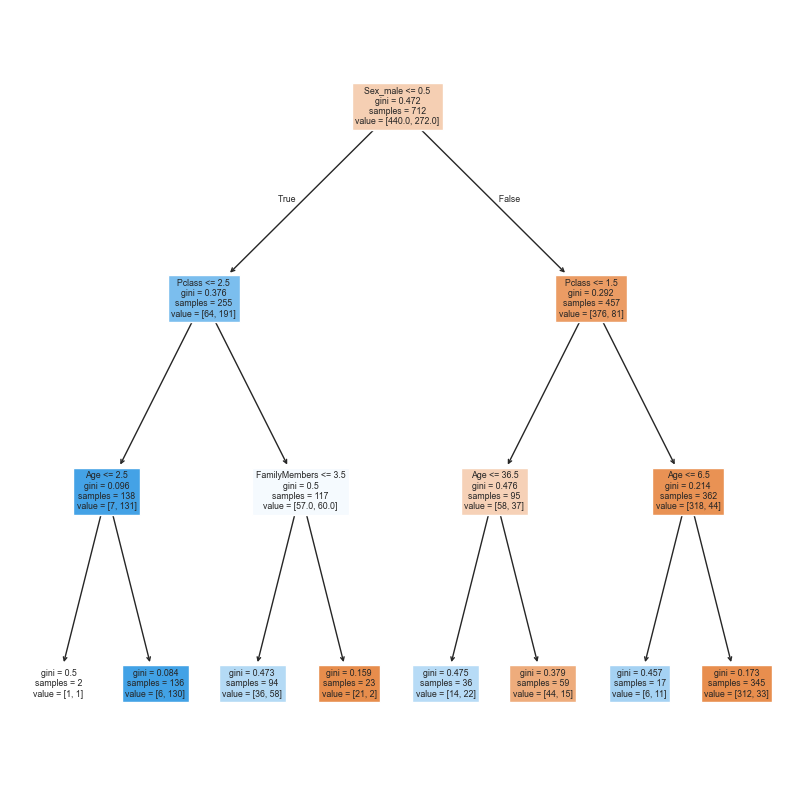

In [120]:

fig = plt.figure(figsize=(10,10))
plot_tree(tree_3_depth, filled=True, feature_names=X.columns)

### Question n°9
Vous allez à présent comparer les performances d'arbre de profondeurs différentes.
- Créez différents arbres, en faisant varier la profondeur entre 1 et la profondeur trouvée à la question n°6.
- Pour chaque arbre, calculer son score (accuracy) à l'aide d'une validation croisée à 5 feuilles.
- Sur un graphique, représentez l'évolution du score en fonction de la profondeur de l'arbre.

- Affichez également la profondeur pour lequel le score est maximal.
- Qu'observez-vous ?

In [121]:
scores = []

#### Observations :
⚠️Attention au caractère aléatoire de la construction d'un arbre (_DecisionTreeClassifier_) !

`à compléter`

### Question n°10
Comparez les valeurs de paramètres possible pour le critère pouvant être utilisé dans la construction d'un arbre de décision :
- Identifier les paramètres de `criterion` (coefficient de _gini_, mesure d'entropie, …)
- Utiliser la profondeur de l'arbre déduite dans la question n°9 (`prof_max`),
- Calculer une validation croisée pour chaque arbre

- Affichez sur un histogramme les valeurs moyennes obtenues.
- Observez-vous un critère qui se détache des autres par ses performances pour ce jeu de données ?

In [122]:
#TODO

## Observations :
`à compléter`

## Créer un modèle de regression

Pour tester le concept de modèle de régression, nous ne pouvons pas utiliser le jeu de données sur le Titanic.<br/>À la place, nous allons nous intéresser à un jeu de données présentant l'évolution de la maladie chez des patients diabétiques.

L'objectif sera de prédire l'évolution de la maladie en un an, en se basant sur des données mesurées un an avant.<br/>Ce jeu de données est directement disponible via la librairie _Scikit-Learn_. (Documentation : [sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html))

_N.B. : Tous les attributs **ont déjà été normalisées**, afin de permettre aux modèles d'être plus efficaces, et de traiter chaque attribut de manière plus équilibrée._

| N° | Attribut | Explications                         |
|----|----------|--------------------------------------|
| 1  | age      | Âge normalisé des patients.          |
| 2  | sex      | Sexe normalisé des patients.         |
| 3  | bmi      | Indice de masse corporelle (BMI), indicateur du surpoids. |
| 4  | bp       | Pression sanguine moyenne (Blood Pressure). |
| 5  | s1       | Taux de cholestérol total normalisé. |
| 6  | s2       | Taux de lipoprotéines de basse densité (LDL). |
| 7  | s3       | Taux de lipoprotéines de haute densité (HDL). |
| 8  | s4       | Concentration de triglycérides normalisée. |
| 9  | s5       | Concentration de glycémie (Glucose) dans le sang. |
| 10 | s6       | Taux de globulines, marqueur de fonction hépatique. |

### Question n°1
Après avoir consulté la documentation :
- Commencez par charger les données dans 2 _DataFrames_ séparés,
    - un pour les attributs,
    - l'autre pour la cible à prédire (réponses).

In [123]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)

### Question n°2
- Affichez les premières lignes des attributs.
- Avez-vous bien repéré contenant la valeur à prédire ?
- Avez-vous bien identifié le DataFrame contenant la variable cible à prédire ?

In [124]:
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Par défaut, les données sont chargées normalisées.<br/>
_N.B. : Une fois normalisé avec une moyenne de 0 et une variance de 1, l'attribut devient une variable continue, avec des valeurs positives ou négatives qui indiquent la distance par rapport à la moyenne de l'échantillon. Cela permet de traiter cette caractéristique de manière cohérente avec les autres attributs du dataset lors de l'entraînement des modèles._

In [126]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

TypeError: LinearRegression.__new__() missing 2 required positional arguments: 'slope' and 'intercept'

La nature des données du _Dataframe_ `diabetes_y` contient des valeurs numériques continues représentant la progression de la maladie diabétique.
- Ces valeurs peuvent être interprétées comme des scores de progression de la maladie.

### Question n°3
Commencez par effectuer une régression linéaire, en prenant bien soin d'avoir des données d'entraînement et de test.
- Quelle erreur quadratique moyenne obtenez-vous ?
- Comment analysez-vous ce résultat ?

In [82]:
#TODO

#### Analyse du MSE / variations
`à compléter`


### Question n°4
Faites une représentation graphique des données réelles par rapport aux données prédites par le modèle :
- Pour chaque attribut, représentez graphiquement les valeurs sur l'abscisse, et l'évolution de la maladie (réelle et prédite) sur les ordonnées.

- Colorez différemment les données en fonction de si elles sont réelles ou prédites.

In [83]:
#TODO

### Question n°5
Sur un seul graphe, affichez les valeurs prédites en fonction des valeurs réelles.
- Tracez également la droite d'équation _y=x_

- Quelles observations faites-vous ?

In [84]:
#TODO

#### Observations
`à compléter`

### Question n°6
Pour une régression linéaire, les valeurs sur les attributs sont cruciales.

_N.B. : Par défaut lorsque vous avez chargé vos données avec Scikit-learn, celles-ci était normalisées._

- Rechargez-les en ajoutant l'option pour obtenir les données brutes.
- Affichez les premières lignes du dataset pour constater les différences de plage de valeurs.

In [85]:
#TODO

### Question n°7
- Réentraînez un modèle de régression linéaire sur ces données non normalisées?

- Que constatez-vous ?

In [86]:
#TODO

### Question n°8
Proposez des modèles de régression polynomiale :
- Tester plusieurs degrés de polynôme, entre 1 et 10.

Pour chacun, calculez le score obtenu, et affichez-le.
- Représentez graphiquement l'évolution de l'erreur quadratique moyenne en fonction du degré du polynôme.

**⚠️Attention :** Pour cette partie, réfléchissez aux données que vous voulez utiliser (normalisées ou non ?)

In [87]:
#TODO

In [88]:
#TODO

#### Observation :
`à compléter`


### Question n°9
- Constatez-vous une différence avec la régression linéaire simple ?

#### Observation
`à compléter`

## Régression avec un arbre de décision

Il est aussi possible d'utiliser les arbres de décision pour construire un modèle de régression.

En utilisant la classe adéquate de _Scikit-Learn_, proposez un arbre de régression sur le jeu de données du diabètes.
- Prenez soin d'analyser la profondeur de l'arbre, afin de choisir celle qui vous parait la plus pertinente.
- Affichez l'arbre obtenant le meilleur score.


### Question n°1
Comparez les résultats obtenus avec ceux de la régression linéaire et de la régression polynomiale.

In [89]:
#TODO

In [90]:
#TODO

#### Comparaison des Résultats
`à compléter`